In [60]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mpl
import warnings
warnings.filterwarnings("ignore")

In [61]:
df = pd.read_csv("data/stud.csv")

In [62]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [63]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [64]:
df.duplicated().sum()

0

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [66]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [67]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [68]:
print("Unqiue values present in 'gender':    ",end=" ")
print(df['gender'].unique())
print("Unique values present in 'race_ethnicity':    ", end="")
print(df['race_ethnicity'].unique())
print("Unique values present in 'parental_level_of_education':    ", end="")
print(df['parental_level_of_education'].unique())
print("Unqiue values present in 'lunch':    ",end=" ")
print(df['lunch'].unique())
print("Unqiue values present in 'test_preparation_course':    ",end=" ")
print(df['test_preparation_course'].unique())

Unqiue values present in 'gender':     ['female' 'male']
Unique values present in 'race_ethnicity':    ['group B' 'group C' 'group A' 'group D' 'group E']
Unique values present in 'parental_level_of_education':    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unqiue values present in 'lunch':     ['standard' 'free/reduced']
Unqiue values present in 'test_preparation_course':     ['none' 'completed']


In [69]:
numberial_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [70]:
numberial_features

['math_score', 'reading_score', 'writing_score']

In [71]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [72]:
print("number of numerical features are {} which are {}".format(len(numberial_features), numberial_features))
print("number of categorical features are {} which are {}".format(len(categorical_features), categorical_features))

number of numerical features are 3 which are ['math_score', 'reading_score', 'writing_score']
number of categorical features are 5 which are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [73]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [74]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3

In [75]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [76]:
reading_full = df[df['reading_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()

In [77]:
print(f"total students scored full marks in math {math_full}")
print(f"total students scored full marks in reading {reading_full}")
print(f"total students scored full marks in writing {writing_full}")

total student score full marks in math 7
total student score full marks in reading 17
total student score full marks in writing 14


In [81]:
reading_less = df[df['reading_score'] <= 20]['gender'].count()
math_less = df[df['math_score'] <= 20]['gender'].count()
writing_less = df[df['writing_score'] <= 20]['gender'].count()

In [82]:
print(f"total students scored less marks in math {math_less}")
print(f"total students scored less marks in reading {reading_less}")
print(f"total students scored less marks in writing {writing_less}")

total students scored less marks in math 4
total students scored less marks in reading 1
total students scored less marks in writing 3


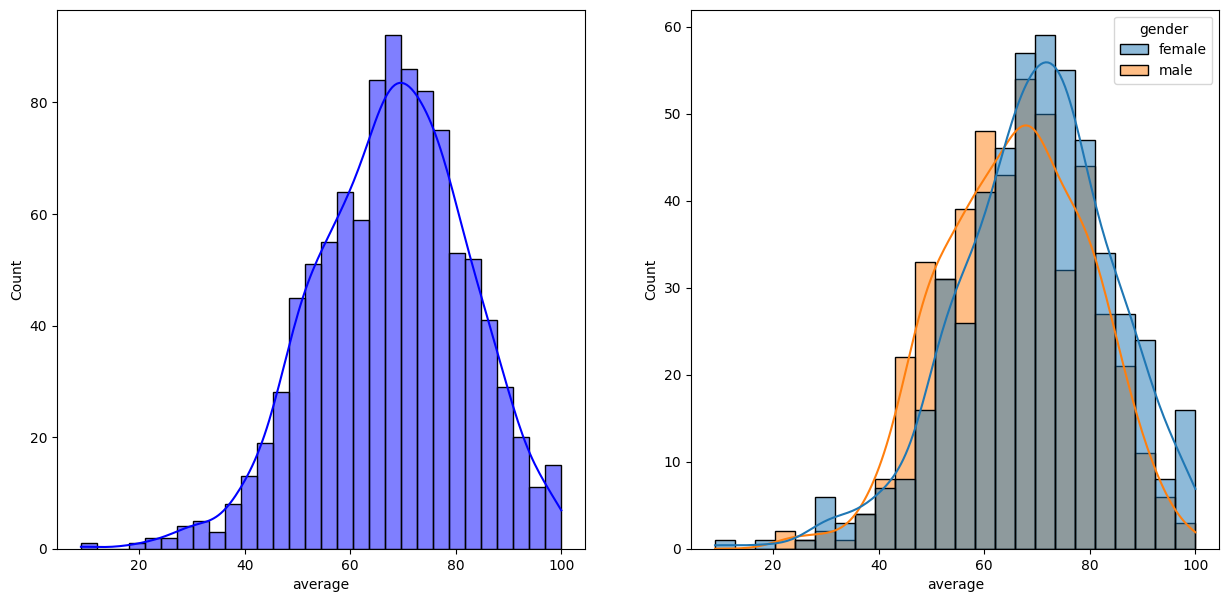

In [89]:
fig, axs = mpl.subplots(1, 2, figsize=(15, 7))
mpl.subplot(121)
sb.histplot(data = df, x='average',bins=30, kde=True, color='b')
mpl.subplot(122)
sb.histplot(data = df, x='average', kde=True, color="blue",hue='gender')
mpl.show()

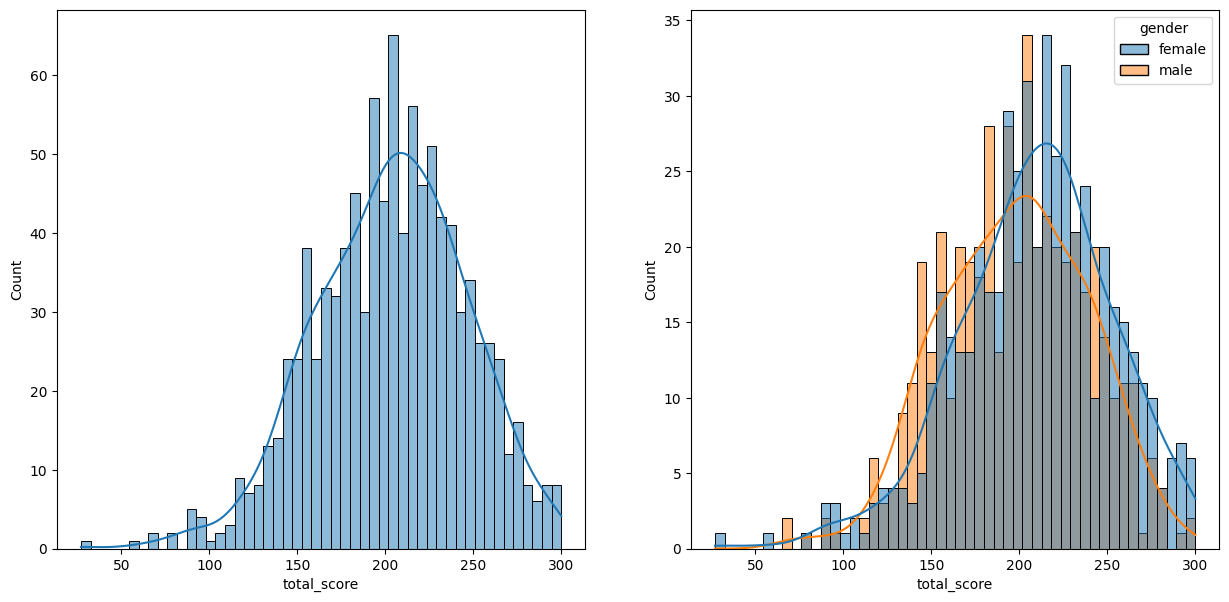

In [91]:
fig, axs = mpl.subplots(1, 2, figsize=(15, 7))
mpl.subplot(121)
sb.histplot(data = df, x = 'total_score', bins = 50, kde = True)
mpl.subplot(122)
sb.histplot(data = df, x = 'total_score', bins = 50, kde = True, hue = "gender")
mpl.show()

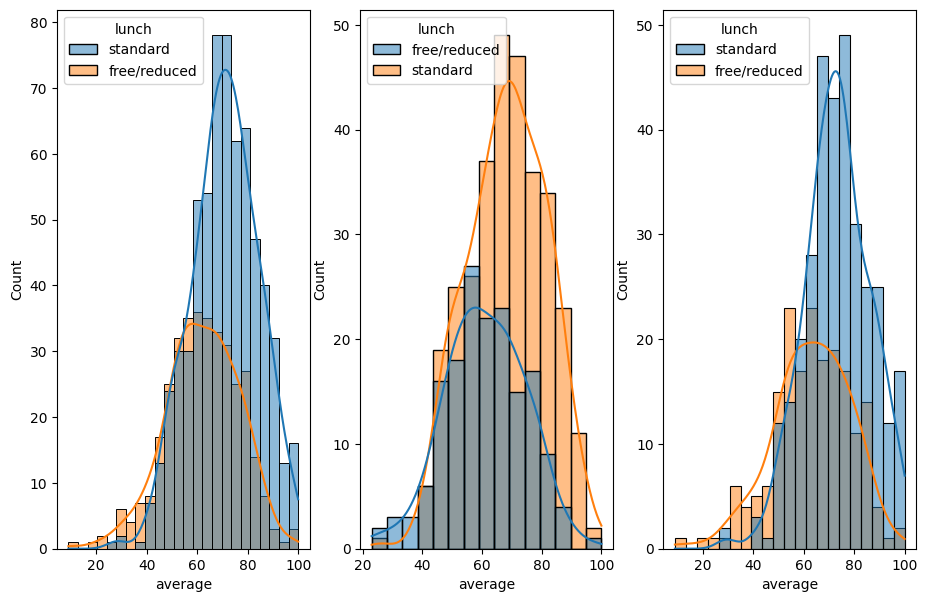

In [99]:
fig, axs = mpl.subplots(1, 3, figsize=(15, 7))
mpl.subplot(141)
sb.histplot(data = df, x = 'average', kde = True, hue = "lunch")
mpl.subplot(142)
sb.histplot(data = df[df["gender"] == 'male'], x = 'average', kde = True, hue = "lunch")
mpl.subplot(143)
sb.histplot(data = df[df.gender == "female"], x = 'average', kde = True, hue = "lunch")
mpl.show()

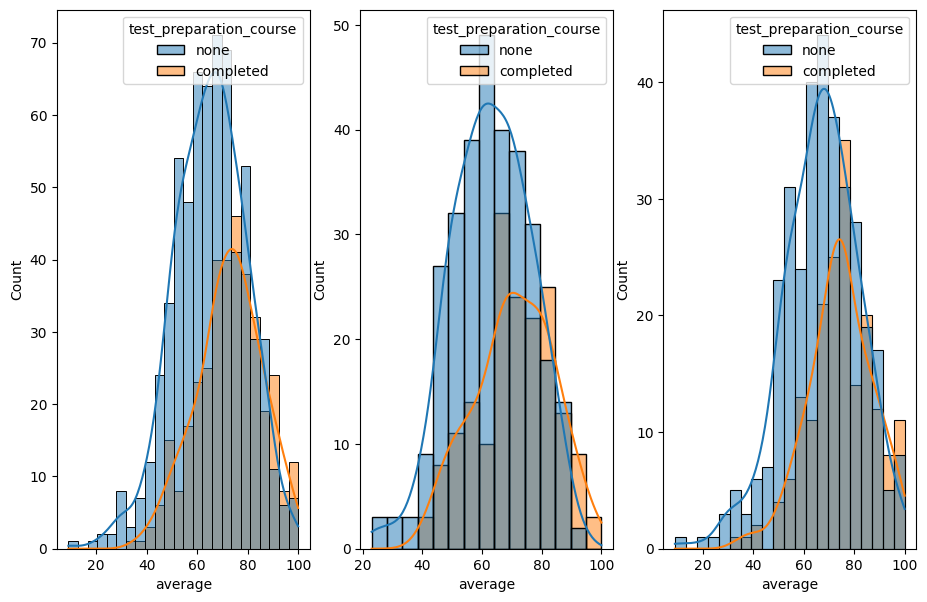

In [100]:
fig, axs = mpl.subplots(1, 3, figsize=(15, 7))
mpl.subplot(141)
sb.histplot(data = df, x = 'average', kde = True, hue = "test_preparation_course")
mpl.subplot(142)
sb.histplot(data = df[df["gender"] == 'male'], x = 'average', kde = True, hue = "test_preparation_course")
mpl.subplot(143)
sb.histplot(data = df[df.gender == "female"], x = 'average', kde = True, hue = "test_preparation_course")
mpl.show()

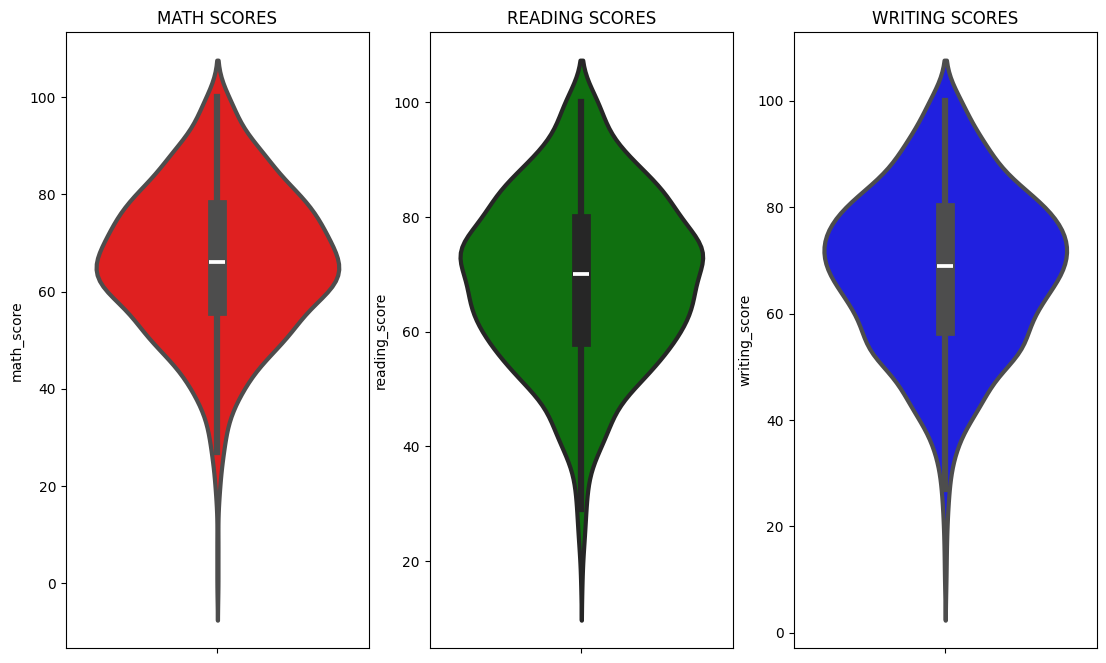

In [105]:
mpl.figure(figsize=(18,8))
mpl.subplot(1, 4, 1)
mpl.title('MATH SCORES')
sb.violinplot(y='math_score',data=df,color='red',linewidth=3)
mpl.subplot(1, 4, 2)
mpl.title('READING SCORES')
sb.violinplot(y='reading_score',data=df,color='green',linewidth=3)
mpl.subplot(1, 4, 3)
mpl.title('WRITING SCORES')
sb.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
mpl.show()